#### 로지스틱 회귀
- 선형 모델 기반으로 분류를 해주는 모델
- 종속변수 즉, 타겟이 범주형 인 경우에 적용
- 결과를 확률로 변환해서 처리
- 종류
    - 2진 분류 : 타겟의 클래스가 2개
    - 다중분류 : 타겟의 클래스가 3개 이상

[1] 모듈 로딩

In [30]:

import pandas as pd

# 판다스에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format

[2] 데이터 준비

In [31]:
DATA_FILE = '../data/fish.csv'

In [32]:
# csv = > DataFrame
fishDF = pd.read_csv(DATA_FILE)
fishDF.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,29.00000,34.00000,12.44400,5.13400


In [33]:
# 타겟/ 종속변수의 클래스 수 => 7개
print(pd.unique(fishDF['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [34]:
# 피쳐 데이터셋 추출
featureDF = fishDF[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(featureDF[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [35]:
# 타겟 추출
targetSR = fishDF['Species'].to_numpy()
print(targetSR[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


[3] 학습 준비

In [36]:
from sklearn.model_selection import train_test_split
# stratify 비율 비슷하게 넣기
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

- 표준화 진행 => 정규 분포

In [37]:
from sklearn.preprocessing import StandardScaler


ss = StandardScaler()
ss.fit(X_train)

# 스케일링 진행
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

[4] 모델 생성  
    - 학습 방법: 지도학습 > 분류  
    - 알고리즘 : 로지스틱 회귀
        - 종속변수 즉, 피쳐에 가중치 곱셈 후 합계 한 결과 >>> 확률값으로 변환

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)


In [39]:
# 선형식의 결과 ==> 0.0 ~1.0 범위의 확률비 값으로 변환
z = np.arange(-5, 5, 0.1)
phi = 1/ (1+ np.exp(-z))

print(f'z => {z}\n phi = {phi}')

z => [-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]
 phi = [0.006693 0.007392 0.008163 0.009013 0.009952 0.010987 0.012128 0.013387
 0.014774 0.016302 0.017986 0.01984  0.021881 0.024127 0.026597 0.029312
 0.032295 0.035571 0.039166 0.043107 0.047426 0.052154 0.057324 0.062973
 0.069138 0.075858 0.083173 0.091123 0.09975  0.109097 0.119203 0.130108
 0.141851 0.154465 0.167982 0.182426 0.197816 0.214165 0.231475 0.24974
 0.268941 0.28905  0.310026 0.331812 0.354344 0.377541 0.401312 0.425557
 0.450166 0.475021 0.5      0.524979 0.549

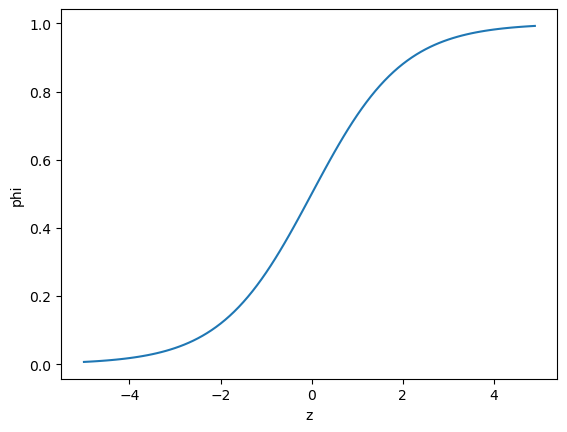

In [40]:
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

[4-1] 로지스틱 회귀로 이진 분류 수행하기

학습진행

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [42]:
# 모델 파라미터
print(f'ovr_clf.estimators_: {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_ : {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_: {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_ }')

ovr_clf.estimators_: 7개
ovr_clf.classes_ : ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
ovr_clf.n_classes_: 7
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [43]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0 분류기] [[-0.652073 -0.422106  0.513708  3.628392 -0.667191]] [-2.654172]
[1 분류기] [[-1.123997 -0.760801 -0.828319  1.928244 -0.691538]] [-3.73238]
[2 분류기] [[-0.030798 -0.022688 -1.805441 -1.771059  3.255123]] [-0.830532]
[3 분류기] [[-0.397599  1.804675  1.836438 -1.583123 -0.886053]] [-3.441905]
[4 분류기] [[-1.759342 -0.479693  0.24011  -0.350309  0.873799]] [-2.489287]
[5 분류기] [[-0.360714 -0.634317 -0.619879 -1.405384 -1.644163]] [-6.71704]
[6 분류기] [[ 0.114539 -0.142091 -0.113608 -0.107152  0.544975]] [-3.188762]


In [44]:
ovr_clf.decision_function(X_test_scaled)

array([[  2.193308,  -2.42386 ,  -2.261136,  -5.267196,  -3.375167,
        -10.549462,  -3.032783],
       [  2.622305,  -3.044213,  -2.322667,  -4.931533,  -3.86566 ,
        -11.801865,  -2.9397  ],
       [ -4.385668,  -2.757777,  -0.134397,  -3.947121,  -1.237734,
         -3.709077,  -3.340855],
       [ -5.22158 ,  -3.405881,   0.276566,  -3.369008,  -1.231454,
         -3.639428,  -3.302121],
       [ -4.545798,  -2.190698,  -0.330784,  -4.469407,  -1.137761,
         -2.698925,  -3.426155],
       [ -3.39736 ,  -3.652863,   1.202987,  -4.128293,  -1.537075,
         -6.745385,  -2.945987],
       [ -1.99065 ,  -6.773063,   1.775628,  -3.438294,  -4.394528,
        -12.49009 ,  -2.375918],
       [  1.753417,  -2.963685,  -2.990574,  -4.624844,  -4.028   ,
        -10.237912,  -3.136489],
       [ -4.82283 ,  -4.658393,  -1.937811,  -0.309229,  -1.825587,
         -4.635921,  -3.593814],
       [ -3.541854, -10.385204,  -1.109457,   2.483546,  -5.975177,
        -13.520601,  -2

In [45]:
ovr_clf.predict(X_test_scaled)

array(['Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Bream', 'Pike', 'Pike', 'Perch', 'Perch', 'Pike', 'Perch',
       'Bream', 'Bream', 'Perch', 'Perch', 'Bream', 'Smelt', 'Smelt',
       'Perch', 'Pike', 'Perch', 'Perch', 'Smelt', 'Perch', 'Parkki',
       'Smelt', 'Perch', 'Perch', 'Bream', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Bream', 'Bream', 'Perch', 'Bream'], dtype='<U9')

In [54]:
ovr_clf.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [52]:
ovr_clf.predict_proba(X_test_scaled)[0]

array([0.775814, 0.070171, 0.0814  , 0.004425, 0.028527, 0.000023,
       0.03964 ])

In [47]:
y_test

array(['Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Bream', 'Pike', 'Pike', 'Roach', 'Whitefish', 'Pike', 'Perch',
       'Bream', 'Bream', 'Perch', 'Roach', 'Bream', 'Smelt', 'Smelt',
       'Perch', 'Pike', 'Roach', 'Perch', 'Smelt', 'Roach', 'Parkki',
       'Smelt', 'Roach', 'Perch', 'Bream', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Bream', 'Parkki', 'Perch', 'Bream'], dtype=object)